In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import torch
import torchtext
from torchtext.data import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn as nn
from torch import Tensor
from typing import Tuple
from torch.nn import functional as F

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load data

In [5]:
df = pd.read_csv('/content/drive/MyDrive/NMT/final_data.csv')

In [6]:
# tokenize by space
tokenizer = get_tokenizer(tokenizer=None)

In [7]:
def build_vocab(iter_text_data, tokenizer):
    counter = Counter()
    for line in iter_text_data:#df.text_clean.to_numpy():
        counter.update(tokenizer(line))
    return Vocab(counter, min_freq=1000, specials=['<unk>', '<pad>', '<bos>', '<eos>'])

In [8]:
%%time
tone_vocab = build_vocab(df.text_clean.to_numpy(), tokenizer)
no_tone_vocab = build_vocab(df.text_clean_no_accent.to_numpy(), tokenizer)

CPU times: user 1min 4s, sys: 171 ms, total: 1min 4s
Wall time: 1min 4s


In [9]:
len(tone_vocab), len(no_tone_vocab)

(4136, 2248)

In [10]:
def data_process(tone_array, no_tone_array, tone_vocab, no_tone_vocab, tokenizer):
    data = []
    for (tone_str, no_tone_str) in tqdm(zip(tone_array, no_tone_array)):
#         print(tone_str, no_tone_str)
#         break
        tone_tensor_ = torch.tensor([tone_vocab[token] for token in tokenizer(tone_str)],
                                dtype=torch.long)
        no_tone_tensor_ = torch.tensor([no_tone_vocab[token] for token in tokenizer(no_tone_str)],
                                dtype=torch.long)
        data.append((tone_tensor_, no_tone_tensor_))
    return data

In [73]:
train_range = 100000#int(df.shape[0]*1/100)
test_range = 1000#int(df.shape[0]*0.5/100)
df_train = df.iloc[:train_range, :]
df_test = df.iloc[-test_range:, :]
df_train.shape, df_test.shape

((100000, 2), (1000, 2))

In [12]:
df_train

,text_clean,text_clean_no_accent
0,chây ì nộp phạt nguội,chay i nop phat nguoi
1,cháu đòi tiền cơm dì đòi tiền nhà,chau doi tien com di doi tien nha
2,đà nẵng nghiên cứu tiện ích nhắn tin khi vi ph...,da nang nghien cuu tien ich nhan tin khi vi ph...
3,khó xử vụ mẹ tuổi trộm xe hơi của con gái,kho xu vu me tuoi trom xe hoi cua con gai
4,thay đổi về đăng ký chuyển nhượng xe từ bạn cầ...,thay doi ve dang ky chuyen nhuong xe tu ban ca...
...,...,...
9995,những khoảnh khắc thảm họa thiên nhiên đáng sợ...,nhung khoanh khac tham hoa thien nhien dang so...
9996,yemen đơn vị điều tra hình sự bị không kích nh...,yemen don vi dieu tra hinh su bi khong kich nh...
9997,nguyên nhân tàu chở khách đâm tàu chở hàng tại mỹ,nguyen nhan tau cho khach dam tau cho hang tai my
9998,thổ nhĩ kỳ cảnh báo binh sĩ mỹ tại các khu vực...,tho nhi ky canh bao binh si my tai cac khu vuc...


In [56]:
# %%time
train_data = data_process(df_train.text_clean.to_numpy(), 
                          df_train.text_clean_no_accent.to_numpy(), 
                          tone_vocab, no_tone_vocab, tokenizer)
# val_data = data_process(df_test.text_clean.to_numpy(), 
#                           df_test.text_clean_no_accent.to_numpy(), 
#                           tone_vocab, no_tone_vocab, tokenizer)


0it [00:00, ?it/s]
2732it [00:00, 27312.54it/s]
5303it [00:00, 26806.01it/s]
8219it [00:00, 27470.25it/s]
10035it [00:00, 21966.15it/s]
12624it [00:00, 23008.82it/s]
14920it [00:00, 22993.51it/s]
17010it [00:00, 22322.30it/s]
19769it [00:00, 19434.38it/s]
22394it [00:01, 21076.05it/s]
24514it [00:01, 20931.45it/s]
27875it [00:01, 23600.16it/s]
30355it [00:01, 23019.62it/s]
32953it [00:01, 23832.49it/s]
35405it [00:01, 23418.89it/s]
38175it [00:01, 24556.70it/s]
41163it [00:01, 25942.31it/s]
43813it [00:01, 25011.45it/s]
46507it [00:01, 25557.72it/s]
49098it [00:02, 22595.86it/s]
51446it [00:02, 17464.18it/s]
54520it [00:02, 20062.88it/s]
57220it [00:02, 21738.01it/s]
59649it [00:02, 22407.25it/s]
62520it [00:02, 23987.02it/s]
65079it [00:02, 19504.12it/s]
67686it [00:03, 21095.49it/s]
70028it [00:03, 21742.68it/s]
72434it [00:03, 22389.59it/s]
74785it [00:03, 20842.67it/s]
77694it [00:03, 22778.35it/s]
80096it [00:03, 18928.51it/s]
82185it [00:03, 13582.06it/s]
83893it [00:03, 13868.3

In [57]:
val_data = data_process(df_test.text_clean.to_numpy(), 
                          df_test.text_clean_no_accent.to_numpy(), 
                          tone_vocab, no_tone_vocab, tokenizer)


1000it [00:00, 28774.82it/s]


In [58]:
BATCH_SIZE = 64
PAD_IDX = tone_vocab['<pad>']
BOS_IDX = tone_vocab['<bos>']
EOS_IDX = tone_vocab['<eos>']

from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

def generate_batch(data_batch):
    tone_batch, no_tone_batch = [], []
    for (tone_item, no_tone_item) in data_batch:
        tone_batch.append(torch.cat([tone_item, torch.tensor([EOS_IDX])], dim=0))
        no_tone_batch.append(torch.cat([no_tone_item, torch.tensor([EOS_IDX])], dim=0))
        
    tone_batch = pad_sequence(tone_batch, padding_value=PAD_IDX, batch_first=True)
    no_tone_batch = pad_sequence(no_tone_batch, padding_value=PAD_IDX, batch_first=True)
    return no_tone_batch, tone_batch

In [14]:
PAD_IDX, BOS_IDX, EOS_IDX

(1, 2, 3)

In [59]:
%%time
train_iter = DataLoader(train_data, batch_size=BATCH_SIZE,
                        shuffle=True, collate_fn=generate_batch)
valid_iter = DataLoader(val_data, batch_size=BATCH_SIZE,
                        shuffle=True, collate_fn=generate_batch)


CPU times: user 1.24 ms, sys: 6 µs, total: 1.25 ms
Wall time: 1.26 ms


In [42]:
max_len = 0
for X, y in train_iter:
    # max_len = max(max_len, X.shape[1])
    print(X.shape, y.shape)
    break
    # break
max_len

torch.Size([64, 28]) torch.Size([64, 28])


0

# Model

In [11]:
class Encoder(nn.Module):
    def __init__(self,
                 vocab_size: int,
                 embed_size: int,
                 num_hiddens: int,
                 num_layers: int,
                 dropout: float):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(embed_size, num_hiddens, num_layers)
        
        self.dropout = nn.Dropout(dropout)

    # X: (batch_size x num_steps)

    def forward(self,
                X: Tensor) -> Tuple[Tensor]:
        X = self.dropout(self.embedding(X))
        # X: (batch_size, num_steps, embed_size)

        X = X.permute(1, 0, 2)
        # X: (num_steps, batch_size, embed_size)
        
        output, state = self.rnn(X)
        # output: (num_steps, batch_size, num_hiddens)
        # state : (num_layers, batch_size, num_hiddens)
        
        return output, state

In [12]:
class AdditiveAttention(nn.Module):
  def __init__(self, key_size, query_size, num_hiddens, dropout):
    super().__init__()
    self.W_k = nn.Linear(key_size, num_hiddens, bias=False)
    self.W_q = nn.Linear(query_size, num_hiddens, bias=False)
    self.W_v = nn.Linear(num_hiddens, 1, bias=False)
    self.dropout = nn.Dropout(dropout)

  # query:  (batch_size x 1 x num_hiddens)
  # keys:   (batch_size, num_steps, num_hiddens)
  # values: (batch_size, num_steps, num_hiddens)
  # mask:   (batch_size x 1 x num_steps)
  def forward(self, queries, keys, values, mask):
    queries, keys = self.W_q(queries), self.W_k(keys)
    # query:  (batch_size x 1 x num_hiddens)
    # keys:   (batch_size, num_steps, num_hiddens)
    # i choosed key_size = num_hiddens

    # queries: (batch_size x 1 x 1 x num_hiddens) `1 query`
    # keys:    (batch_size x 1 x num_steps x num_hiddens)
    # broadcast sum
    features = queries.unsqueeze(2) + keys.unsqueeze(1)
    # features: (batch_size x 1 x num_steps x num_hiddens)

    features = torch.tanh(features)

    scores = self.W_v(features).squeeze(-1)
    # scores: (batch_size x 1 x num_steps x 1).squeeze(-1): (batch_size x 1 x num_steps)

    self._attention_weights = F.softmax(scores.masked_fill(mask=mask, value=-np.inf), dim=-1)
    
    # return shape: (batch_size, 1, num_hiddens) `1 query`
    return torch.bmm(self._attention_weights, values)

In [13]:
queries, keys = torch.normal(0, 1, (2, 1, 20)), torch.ones(2, 10, 2)
values = torch.arange(40, dtype=torch.float32).reshape(1, 10, 4).repeat(2, 1, 1)

attention = AdditiveAttention(2, 20, 8, 0.1)
attention.eval()
mask = torch.stack([torch.cat((torch.zeros(2), torch.ones(8))),
                    torch.cat((torch.zeros(6), torch.ones(4)))]).unsqueeze(1).type(torch.bool)
attention(queries, keys, values, mask).shape, values.shape

(torch.Size([2, 1, 4]), torch.Size([2, 10, 4]))

In [30]:
class Decoder(nn.Module):
    def __init__(self,
                 vocab_size: int,
                 embed_size: int,
                 num_hiddens: int,
                 num_layers: int,
                 dropout: float = 0.0):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.attention = AdditiveAttention(num_hiddens, num_hiddens, num_hiddens, dropout)
        self.rnn = nn.GRU(embed_size + num_hiddens, num_hiddens, num_layers)
        self.dense = nn.Linear(num_hiddens, vocab_size)
        self.log_softmax = nn.LogSoftmax(dim=2)
        self.dropout = nn.Dropout(dropout)

        self._attention_weights = []
    
    def init_state(self, enc_outputs):
      # outputs (num_steps x batch_size x num_hidden)
      outputs, hidden_states = enc_outputs
      return (outputs.permute(1, 0, 2), hidden_states)
    
    # X:     (batch_size x num_steps)
    # state: ((batch_size, num_steps, num_hiddens), (num_layers, batch_size, num_hiddens))
    # mask:  (batch_size x 1 x num_steps)
    def forward(self,
                X: Tensor,
                state: Tensor,
                mask: Tensor) -> Tuple[Tensor]:
        X = self.dropout(self.embedding(X))
        # X: (batch_size x num_steps x embed_size)

        X = X.permute(1, 0, 2)
        # X: (num_steps x batch_size x embed_size)

        enc_outputs, hidden_state = state

        outputs = []

        # for every steps
        for x in X:
          query = torch.unsqueeze(hidden_state[-1], dim=1)
          # query: (batch_size x 1 x num_hiddens)
          context = self.attention(query, enc_outputs, enc_outputs, mask)
          # context: (batch_size, 1, num_hiddens)
          x = torch.cat((context, torch.unsqueeze(x, dim=1)), dim=-1)
          # x = (batch_size, 1, num_hiddens) cat with (batch_size x 1 x embed_size)
          # x: (batch_size, 1, num_hiddens + embed_size)
          output, hidden_state = self.rnn(x.permute(1, 0, 2), hidden_state)
          # output      : (1, batch_size, num_hiddens + embed_size)
          # hidden_state: (num_layers, batch_size, num_hiddens)

          outputs.append(output)
          self._attention_weights.append(self.attention._attention_weights)
        outputs = self.dense(torch.cat(outputs, dim=0))
        outputs = self.log_softmax(outputs)

        # return shape: (batch_size, num_steps, vocab_size), [(batch_size, num_steps, num_hiddens), (num_layers, batch_size, num_hiddens)]
        return outputs.permute(1, 0, 2), [enc_outputs, hidden_state]

In [15]:
class Seq2Seq(nn.Module):
    def __init__(self,
                 encoder: nn.Module,
                 decoder: nn.Module,
                 pad_idx: int,
                 device: torch.device,):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.pad_idx = pad_idx
        self.device = device
    def create_mask(self, src):
      return (src == self.pad_idx).unsqueeze(1)
    
    # enc_x: (batch_size x num_steps)
    # dec_X: (batch_size x num_steps)
    def forward(self,
                enc_X: Tensor,
                dec_X: Tensor) -> Tensor:
        mask = self.create_mask(enc_X)
        # mask: (batch_size x 1 x num_steps)

        enc_outputs = self.encoder(enc_X)
        # enc_outputs
        # output: (num_steps, batch_size, num_hiddens)
        # state : (num_layers, batch_size, num_hiddens)

        dec_state = self.decoder.init_state(enc_outputs)
        # dec_state: ((batch_size, num_steps, num_hiddens), (num_layers, batch_size, num_hiddens))

        return self.decoder(dec_X, dec_state, mask)

# Train & evaluate model

In [16]:
def train_seq2seq(net, data_iter, lr, num_epochs, no_tone_vocab, device):
    def xavier_init_weights(m):
        if type(m) == nn.Linear:
            nn.init.xavier_uniform_(m.weight)
        if type(m) == nn.GRU:
            for param in m._flat_weights_names:
                if "weight" in param:
                    nn.init.xavier_uniform_(m._parameters[param])
    net.apply(xavier_init_weights)
    net.to(device)
    
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    
    PAD_IDX = tone_vocab.stoi['<pad>']
    loss = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
    net.train()
    
    for epoch in range(num_epochs):
        epoch_loss = 0
        for batch in tqdm(data_iter, position=0, leave=True):
            optimizer.zero_grad()
            
            X, Y = [x.to(device) for x in batch]
            # X: (batch_size x num_steps)
            # Y: (batch_size x num_steps)

            bos = torch.tensor([tone_vocab.stoi['<bos>']]*Y.shape[0], device=device).reshape(-1, 1)
            dec_input = torch.cat([bos, Y[:, :-1]], 1) # teacher forcing

            # dec_input: (batch_size x num_steps)

            Y_hat, _ = net(X, dec_input)
            # Y_hat: (batch_size, num_steps, vocab_size)
            # _: [(batch_size, num_steps, num_hiddens), (num_layers, batch_size, num_hiddens)]

            l = loss(Y_hat.permute(0, 2, 1), Y)#nn.functional.one_hot(Y, len(no_tone_vocab)).squeeze())
            
            l.backward()
            
            # clip gradient
            torch.nn.utils.clip_grad_norm_(net.parameters(), 1)
            optimizer.step()
            epoch_loss += l.item()
        if ((epoch + 1) % 1 == 0):
            print(f'Epoch {epoch}, Loss {epoch_loss/len(data_iter):.10f}')

In [61]:
def evaluate(net, sentence, no_tone_vocab, tone_vocab, max_length, device, beam_size):
  net.eval()

  src_tokens = [no_tone_vocab.stoi[word] for word in sentence.lower().split(" ")] + [no_tone_vocab.stoi['<eos>']]

  # unsqueeze add batch dim
  enc_X = torch.unsqueeze(
      torch.tensor(src_tokens, dtype=torch.long, device=device), dim=0
  )
  mask = (enc_X == no_tone_vocab.stoi['<pad>']).unsqueeze(1)

  #TODO: add attention to beam
  net.decoder._attention_weights = []

  with torch.no_grad():
    enc_outputs = net.encoder(enc_X)
    # enc_outputs
    # output: (num_steps, batch_size, num_hiddens)
    # state : (num_layers, batch_size, num_hiddens)
  
  outputs, dec_state = net.decoder.init_state(enc_outputs)
  # outputs:   (batch_size, num_steps, num_hiddens)
  # dec_state: (num_layers, batch_size, num_hiddens)
  
  outputs = outputs.repeat((beam_size, 1, 1))
  dec_state = dec_state.repeat((1, beam_size, 1))


  beam = [Beam(beam_size, 1, 2, 3, GNMTGlobalScorer(), 5) for _ in range(1)]
  

  for i in range(max_length):
    if all((b.done() for b in beam)):
      break
    with torch.no_grad():
      dec_X = torch.stack([b.get_current_state() for b in beam]).t().contiguous().view(1, -1).t().to(device)
      Y, (outputs, dec_state) = net.decoder(dec_X, (outputs, dec_state), mask)
      # Y:        (batch_size, num_steps, vocab_size)
      # outputs:  (batch_size, num_steps, num_hiddens)
      # dec_state:(num_layers, batch_size, num_hiddens)

      select_indices_array = []
      for j, b in enumerate(beam):
        b.advance(Y[:, j])
        select_indices_array.append(b.get_current_origin() * 1 + j)
      
      select_indices = torch.cat(select_indices_array) \
                      .view(1, beam_size) \
                      .transpose(0, 1) \
                      .contiguous() \
                      .view(-1).type(torch.int32).to(device)
      
      dec_state = dec_state.index_select(1, select_indices)
  ret = _from_beam(beam)
  return ret


# Train in action

In [31]:
tone_vocab_size = len(tone_vocab)
no_tone_vocab_size = len(no_tone_vocab)

embed_size = 128
num_hiddens = 128
num_layers = 1
dropout = 0.0

lr = 0.008
num_epochs = 20

enc = Encoder(no_tone_vocab_size, embed_size, num_hiddens, num_layers, dropout)

dec = Decoder(tone_vocab_size, embed_size, num_hiddens, num_layers, dropout)

net = Seq2Seq(enc, dec, tone_vocab.stoi['<pad>'], device).to(device)

net.load_state_dict(torch.load("/content/drive/MyDrive/Colab Notebooks/gru_encoder_decoder_attention_weights_correct.pth", map_location=torch.device('cpu')))
net.eval()

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(2248, 128)
    (rnn): GRU(128, 128)
    (dropout): Dropout(p=0.0, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(4136, 128)
    (attention): AdditiveAttention(
      (W_k): Linear(in_features=128, out_features=128, bias=False)
      (W_q): Linear(in_features=128, out_features=128, bias=False)
      (W_v): Linear(in_features=128, out_features=1, bias=False)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (rnn): GRU(256, 128)
    (dense): Linear(in_features=128, out_features=4136, bias=True)
    (log_softmax): LogSoftmax(dim=2)
    (dropout): Dropout(p=0.0, inplace=False)
  )
)

In [32]:
def count_parameters(model: nn.Module):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f'The model has {count_parameters(net):,} trainable parameters')

The model has 1,630,888 trainable parameters


In [62]:
train_seq2seq(net, train_iter, lr, num_epochs, no_tone_vocab, device)

  0%|          | 2/1563 [00:00<02:21, 11.00it/s]

Epoch 0, Loss 2.8661183019


  0%|          | 2/1563 [00:00<02:11, 11.87it/s]

Epoch 1, Loss 1.2553576452


  0%|          | 1/1563 [00:00<02:52,  9.08it/s]

Epoch 2, Loss 1.1172081811


  0%|          | 2/1563 [00:00<01:57, 13.28it/s]

Epoch 3, Loss 0.8600581089


  0%|          | 2/1563 [00:00<02:14, 11.60it/s]

Epoch 4, Loss 0.6470306327


  0%|          | 2/1563 [00:00<02:11, 11.90it/s]

Epoch 5, Loss 0.5648341948


  0%|          | 2/1563 [00:00<02:19, 11.16it/s]

Epoch 6, Loss 0.5243893058


  0%|          | 2/1563 [00:00<02:07, 12.21it/s]

Epoch 7, Loss 0.5347159102


  0%|          | 2/1563 [00:00<01:53, 13.70it/s]

Epoch 8, Loss 0.5094209996


  0%|          | 2/1563 [00:00<02:06, 12.36it/s]

Epoch 9, Loss 0.5179095048


  0%|          | 2/1563 [00:00<02:16, 11.43it/s]

Epoch 10, Loss 0.4970319890


  0%|          | 2/1563 [00:00<02:03, 12.66it/s]

Epoch 11, Loss 0.4964913048


  0%|          | 2/1563 [00:00<01:58, 13.16it/s]

Epoch 12, Loss 0.4955945895


  0%|          | 2/1563 [00:00<01:53, 13.80it/s]

Epoch 13, Loss 0.4899392009


  0%|          | 2/1563 [00:00<02:07, 12.27it/s]

Epoch 14, Loss 0.4800641102


  0%|          | 2/1563 [00:00<02:14, 11.62it/s]

Epoch 15, Loss 0.4868701970


  0%|          | 2/1563 [00:00<02:11, 11.86it/s]

Epoch 16, Loss 0.5113624723


  0%|          | 2/1563 [00:00<02:06, 12.33it/s]

Epoch 17, Loss 0.4964607733


  0%|          | 2/1563 [00:00<02:09, 12.03it/s]

Epoch 18, Loss 0.5131721485


100%|██████████| 1563/1563 [02:09<00:00, 12.05it/s]

Epoch 19, Loss 0.5142165320


In [64]:
torch.save(net.state_dict(), 'gru_encoder_decoder_attention_weights.pth')

# Beam search

In [24]:
class GNMTGlobalScorer(object):
    """
    NMT re-ranking score from
    "Google's Neural Machine Translation System" :cite:`wu2016google`
    Args:
       alpha (float): length parameter
       beta (float):  coverage parameter
    """

    def __init__(self):
      super().__init__()

    def score(self, beam, logprobs):
        # """
        # Rescores a prediction based on penalty functions
        # """
        # normalized_probs = self.length_penalty(beam,
        #                                        logprobs,
        #                                        self.alpha)
        # if not beam.stepwise_penalty:
        #     penalty = self.cov_penalty(beam,
        #                                beam.global_state["coverage"],
        #                                self.beta)
        #     normalized_probs -= penalty

        return logprobs

In [19]:
class Beam(object):
  def __init__(self, size, pad, bos, eos, global_scorer, min_length):
    super().__init__()
    self.prev_ks = []
    self.scores = torch.FloatTensor(size).zero_()
    self.all_scores = []

    self.min_length = min_length

    self.next_ys = [torch.LongTensor(size)
                        .fill_(pad)]
    self.next_ys[0][0] = bos

    self.finished = []

    self.global_scorer = global_scorer

    self._eos = eos
    self.eos_top = False

    self.size = size

  def get_current_state(self):
    "Get the outputs for the current timestep."
    return self.next_ys[-1]

  def get_current_origin(self):
    "Get the backpointers for the current timestep."
    return self.prev_ks[-1]
  def done(self):
    return self.eos_top
  def sort_finished(self, minimum=None):
    if minimum is not None:
        i = 0
        # Add from beam until we have minimum outputs.
        while len(self.finished) < minimum:
            global_scores = self.global_scorer.score(self, self.scores)
            s = global_scores[i]
            self.finished.append((s, len(self.next_ys) - 1, i))
            i += 1

    self.finished.sort(key=lambda a: -a[0])
    scores = [sc for sc, _, _ in self.finished]
    ks = [(t, k) for _, t, k in self.finished]
    return scores, ks

  def get_hyp(self, timestep, k):
      """
      Walk back to construct the full hypothesis.
      """
      hyp = []
      for j in range(len(self.prev_ks[:timestep]) - 1, -1, -1):
          hyp.append(self.next_ys[j + 1][k])
          k = self.prev_ks[j][k]
      return hyp[::-1]
  def advance(self, word_probs):
    word_probs = word_probs.unsqueeze(0)
    # print("word_probs", word_probs.shape)
    num_words = word_probs.size(2)
    
    # dont let this shit end
    cur_len = len(self.next_ys)
    # print("cur_len", cur_len)
    if cur_len < self.min_length:
        for k in range(len(word_probs)):
            word_probs[0][k][self._eos] = -1e20
            # print("word", self._eos, "has", word_probs[k][self._eos])

    if len(self.prev_ks) > 0:
      beam_scores = word_probs + self.scores.unsqueeze(1).expand_as(word_probs).to(device)
      # print("beam_scores.shape", beam_scores.shape, "word_probs", word_probs.shape, "self.scores.unsqueeze(1).expand_as(word_probs)", self.scores.unsqueeze(1).expand_as(word_probs).shape)
      beam_scores = beam_scores.squeeze(0)
      # print("beam_scores", beam_scores)
      for i in range(self.next_ys[-1].size(0)):
        if self.next_ys[-1][i] == self._eos:
          # print("sentence", i, 'is ended')
          beam_scores[i] = -1e20
    else:
      beam_scores = word_probs[0][0]
      # print("beam_scores.shape first time", beam_scores.shape)

    
    flat_beam_scores = beam_scores.view(-1)
    # print("self.size", self.size, "flat_beam_scores.shape", flat_beam_scores.shape)
    
    best_scores, best_scores_id = flat_beam_scores.topk(self.size, 0,
        True, True)
    
    self.all_scores.append(self.scores)
    self.scores = best_scores
    # print("best_scores", best_scores, "best_scores_id", best_scores_id)
    
    # print("flat_beam_scores", flat_beam_scores, "best_scores", best_scores, "best_scores_id", best_scores_id)
    # print("num_words", num_words)
    prev_k = torch.floor(best_scores_id / num_words).long()
    # print("prev_k", prev_k)
    self.prev_ks.append(prev_k)
    self.next_ys.append((best_scores_id - prev_k * num_words))
    # print("self.prev_ks", self.prev_ks)
    # print("self.next_ys", self.next_ys)
    for i in range(self.next_ys[-1].size(0)):
      if self.next_ys[-1][i] == self._eos:
        # print("self.scores", self.scores)
        global_scores = self.global_scorer.score(self, self.scores)
        s = global_scores[i]
        self.finished.append((s, len(self.next_ys) - 1, i))

    if self.next_ys[-1][0] == self._eos:
      self.all_scores.append(self.scores)
      self.eos_top = True

In [ ]:
# a = torch.rand(1, 4136)
# b = torch.ones(4, 1)
# b.expand_as()
# torch.FloatTensor(4).zero_().unsqueeze(0).shape

In [20]:
def _from_beam(beam):
    ret = {"predictions": [],
            "scores": [],
            "attention": []}
    for b in beam:
        # n_best = self.n_best
        scores, ks = b.sort_finished(minimum=None)
        # print(scores, ks)
        hyps, attn = [], []
        for i, (times, k) in enumerate(ks):#[:n_best]):
            # hyp, att = b.get_hyp(times, k)
            hyp = b.get_hyp(times, k)
            hyps.append(hyp)
            # attn.append(att)
        ret["predictions"].append(hyps)
        ret["scores"].append(scores)
        # ret["attention"].append(attn)
    return ret

In [62]:
sentence = "tram nam trong coi nguoi ta"
beam = evaluate(net, sentence, no_tone_vocab, tone_vocab, 20, device, 4)

In [63]:
predictions = []
for i, prediction in enumerate(beam['predictions'][0]):
  predictions.append(' '.join(tone_vocab.itos[idx] for idx in prediction[:-1]))
  print(predictions[i])
  # print(prediction)

trạm năm trong cõi người ta
trạm năm trong còi người ta
trăm năm coi cõi người ta
trạm nằm còi còi người ta


In [41]:
import seaborn as sns
import matplotlib.pylab as plt

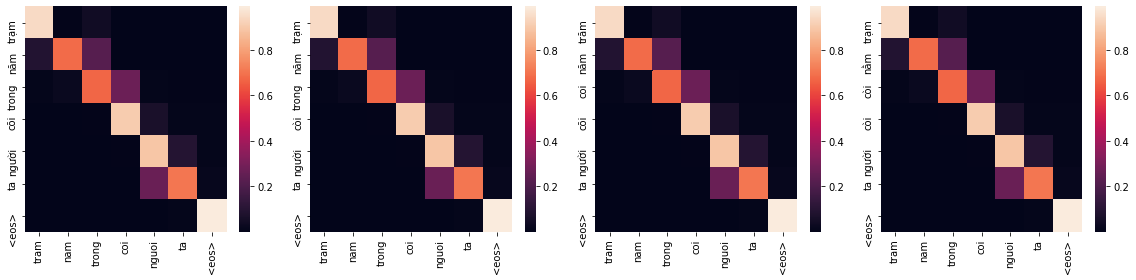

In [69]:
num_steps = len(net.decoder._attention_weights)
batch_size = net.decoder._attention_weights[0].shape[0]
heatmap_matrix = torch.cat([steps for steps in net.decoder._attention_weights], dim=1)

fig, ax = plt.subplots(1, batch_size, figsize=(16, 4))
for batch in range(batch_size):
  ax[batch] = sns.heatmap(heatmap_matrix[i], 
                              ax=ax[batch],
                              xticklabels=[w for w in sentence.split()] + ["<eos>"],
                              yticklabels=[w for w in predictions[batch].split()] + ["<eos>"])
plt.tight_layout()

In [37]:
beam

{'attention': [],
 'predictions': [[[tensor(279), tensor(3)], [tensor(235), tensor(3)]]],
 'scores': [[tensor(-3.4922), tensor(-4.8874)]]}

# Evaluate model

In [70]:
def inference(sentence):
  beam = evaluate(net, sentence, no_tone_vocab, tone_vocab, 20, device, 4)
  if len(beam['predictions'][0]) > 0:
    return ' '.join(tone_vocab.itos[idx] for idx in beam['predictions'][0][0][:-1])
  else:
    return ''

In [71]:
inference("tram nam roi lai ra di")

'trạm năm rồi lại ra đi'

In [74]:
%%time
df_test['predict'] = df_test.text_clean_no_accent.apply(inference)

CPU times: user 40 s, sys: 9.69 s, total: 49.7 s
Wall time: 24.9 s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
def sentence_accuracy(row):
  src = row.text_clean.split(" ")
  predict = row.predict.split(" ")
  t = 0
  for i in range(min(len(src), len(predict))):
    if (src[i] == predict[i]):
      t += 1
  return t/len(src)

In [76]:
%%time
df_test['accuracy'] = df_test.apply(sentence_accuracy, axis=1)

CPU times: user 24.5 ms, sys: 0 ns, total: 24.5 ms
Wall time: 24.2 ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
df_test.accuracy.mean()

0.712119025788827

(array([ 19.,   0.,   7.,   8.,  10.,  20.,  15.,  14.,  23.,  16.,  62.,
         64.,  61.,  91.,  72., 101., 134.,  58., 117., 108.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

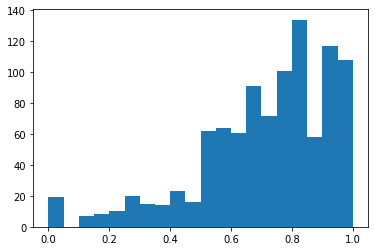

In [78]:
plt.hist(df_test.accuracy, bins=20)